### Import the library

In [1]:
import bigdatavoyant as bdv

### Read the geospatial file

In [2]:
gdf = bdv.io.read_file('data/osm-wales-free.shp')

Opened file osm-wales-free.shp, using driver ESRI Shapefile.
Found 21047 features.
Opened file osm-wales-free.arrow, created by geovaex v.0.0.1 using GDAL driver ESRI Shapefile.


### V-1 MBR

In [3]:
mbr = gdf.profiler.mbr()
print(mbr)

POLYGON ((-0.0251785 50.3177, -0.0251785 53.559, -5.41189 53.559, -5.41189 50.3177, -0.0251785 50.3177))


### V-2 Feature Count

In [4]:
gdf.profiler.featureCount

21047

### V-3 Values per thematic attribute

In [5]:
count = gdf.profiler.count()
print(count)

{'osm_id': 21047, 'code': 21047, 'fclass': 21047, 'name': 10555}


### V-4 Convex/Concave Hull
<span style="color:red">Only convex hull has been implemented</span>

In [6]:
hull = gdf.profiler.convex_hull()
print(hull)

POLYGON ((-4.1884 50.3177, -5.41189 51.8527, -4.69956 53.3067, -4.60827 53.4212, -4.42493 53.4284, -0.0251785 53.559, -4.1884 50.3177))


### V-5 Thumbnail generation

Wrote file thumbnail.jpg, 159428 bytes.


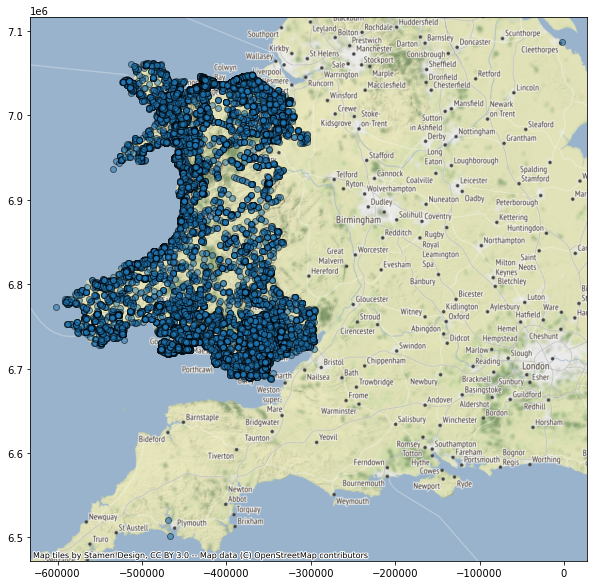

In [7]:
gdf.profiler.thumbnail('thumbnail.jpg', maxpoints=1000000)

### V-6 Native CRS of the dataset

In [8]:
gdf.profiler.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
crs = gdf.profiler.crs
print(crs)

EPSG:4326


### V-7 Attribute names

In [10]:
attributes = gdf.profiler.attributes()
print(attributes)

['osm_id', 'code', 'fclass', 'name']


### V-8 Attribute data types

In [11]:
datatypes = gdf.profiler.data_types()
datatypes

{'osm_id': 'str', 'code': 'int64', 'fclass': 'str', 'name': 'str'}

### V-9 Distribution of values per attribute

In [12]:
%%time
gdf.profiler.categorical()

CPU times: user 138 ms, sys: 8.28 ms, total: 147 ms
Wall time: 156 ms


['code', 'fclass']

In [13]:
%%time
distribution = gdf.profiler.distribution(attributes=None, n_obs=5, dropmissing=True)

CPU times: user 18.6 ms, sys: 333 µs, total: 19 ms
Wall time: 19.8 ms


In [14]:
distribution.to_json()

'{"code": {"2004": 2643, "2902": 2257, "2304": 1443, "2701": 978, "2303": 926}, "fclass": {"post_box": 2643, "bench": 2257, "pub": 1443, "tourist_info": 978, "cafe": 926}}'

INFO:MainThread:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:MainThread:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


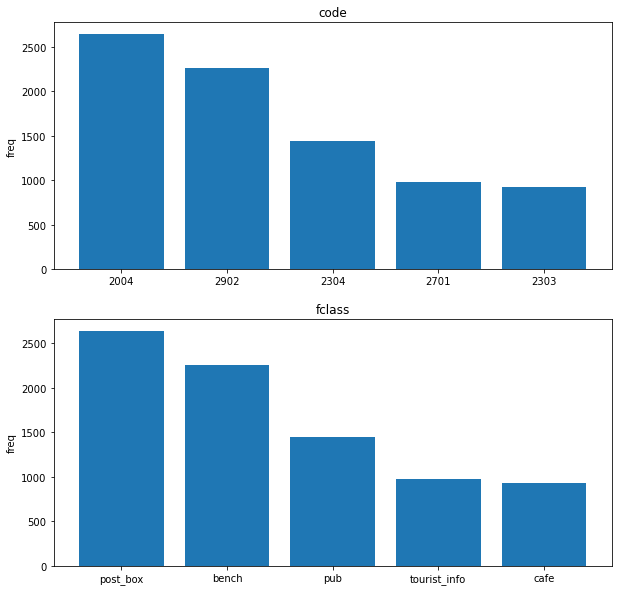

In [15]:
distribution.plot()

### V-10 Data samples

In [16]:
sample = gdf.profiler.get_sample(n_obs=10, method="random", bbox=None)
sample

#,osm_id,code,fclass,name
0,7514681683,2101,pharmacy,None
1,521359910,2304,pub,The Ancient Briton
2,7512360552,2514,chemist,Boots
3,1879887653,2303,cafe,The Delicatessen
4,7063639342,2512,clothes,Peacocks
5,460359085,2006,telephone,Telephone Box
6,4630792893,2512,clothes,Suit Direct
7,5339497930,2101,pharmacy,Boots
8,30808789,2030,recycling,None
9,3398108202,2404,guesthouse,Little Hendre Lodge


In [17]:
sample = gdf.profiler.get_sample(n_obs=3, method="last", bbox=None)
sample

#      osm_id    code  fclass    name
  0  7647138466    2724  memorial  None
  1  7647138467    2724  memorial  None
  2  7647138468    2724  memorial  'Memorial to Welsh Volunteers in the Spanish Civ...

In [18]:
gdf.profiler.get_sample(
    n_obs=10, 
    method="random",
    bbox=[-3., 52.9, -2.9, 53.]
)

#,osm_id,code,fclass,name
0,5940942551,2004,post_box,None
1,1232331457,2032,recycling_paper,None
2,667138432,2001,police,None
3,2118296549,2004,post_box,None
4,666979417,2005,post_office,None
5,666979396,2006,telephone,None
6,5082702099,2724,memorial,None
7,5941008653,2004,post_box,None
8,2118293686,2004,post_box,None
9,1259363001,2030,recycling,None


### V-11 Cardinality estimation
<span style="color:red">TODO / Obsolete?</span>

### V-12 Quartiles (for numeric attributes)

In [19]:
quantiles = gdf.profiler.quantiles()
quantiles

,5,25,50,75,95
code,2003.67086,2202.320315,2420.963277,2724.286147,2903.256548


In [20]:
quantiles.to_json()

'{"5":{"code":2003.6708595604},"25":{"code":2202.3203145828},"50":{"code":2420.9632772085},"75":{"code":2724.2861467928},"95":{"code":2903.2565483468}}'

### V-13 Distinct values (for categorical attributes)

In [21]:
distinct = gdf.profiler.distinct(n_obs=10)

In [22]:
distinct

{'code': [2907, 2304, 2701, 2005, 2742, 2004, 2723, 2006, 2030, 2205],
 'fclass': ['camera_surveillance',
  'pub',
  'tourist_info',
  'post_office',
  'viewpoint',
  'post_box',
  'monument',
  'telephone',
  'recycling',
  'playground']}

### V-14 Most frequent values (for categorical attributes)

In [23]:
gdf.profiler.recurring(attributes=None, n_obs=5)

{'code': [2004, 2902, 2304, 2701, 2303],
 'fclass': ['post_box', 'bench', 'pub', 'tourist_info', 'cafe']}

### V-15 Heatmap

In [24]:
gdf.profiler.heatmap(maxpoints=1000000)

### V-16 Clusters & outliers

In [25]:
# use DBSCAN
# alg = 'dbscan'
# min_pts = 15
# eps = 100

# use HDBSCAN
alg = 'hdbscan'
min_pts = 11
eps = None

pois, eps_per_cluster, info = gdf.profiler.compute_clusters(alg=alg, min_pts=min_pts, eps=eps, n_jobs=-1)

Number of clusters: 390
Number of clustered POIs: 14803
Number of outlier POIs: 6244


In [26]:
cluster_borders = gdf.profiler.cluster_borders(pois_in_clusters=pois, shape_type=1, eps_per_cluster=eps_per_cluster)

In [27]:
cluster_borders

,cluster_id,geometry,size
0,0,"POLYGON ((-3.32568 52.47978, -3.39813 52.51078...",33
1,1,"POLYGON ((-3.66524 52.42022, -3.70767 52.43003...",23
2,2,"POLYGON ((-3.54513 52.43073, -3.60069 52.46785...",22
3,3,"POLYGON ((-3.68587 52.08211, -3.68588 52.08218...",22
4,4,"POLYGON ((-3.69551 52.68910, -3.71709 52.73047...",16
...,...,...,...
384,384,"POLYGON ((-3.16641 51.46835, -3.16916 51.47008...",40
385,385,"POLYGON ((-3.16072 51.46080, -3.16587 51.46199...",181
386,386,"POLYGON ((-3.16698 51.49365, -3.16489 51.49660...",49
387,387,"POLYGON ((-3.16540 51.48568, -3.16616 51.48606...",12


In [28]:
gdf.profiler.plot_clusters(cluster_borders)

### EXTRA: Statistics

In [29]:
gdf.profiler.statistics()

,min,max,mean,median,std,sum
code,2001,2964,2443.722811,2419.331621,317.632533,51433034.0


### Report

Wrote file b531198c-29c6-4cec-84e4-108b323ec5dc.jpg, 159428 bytes.
Wrote file report.json, 5959 bytes.


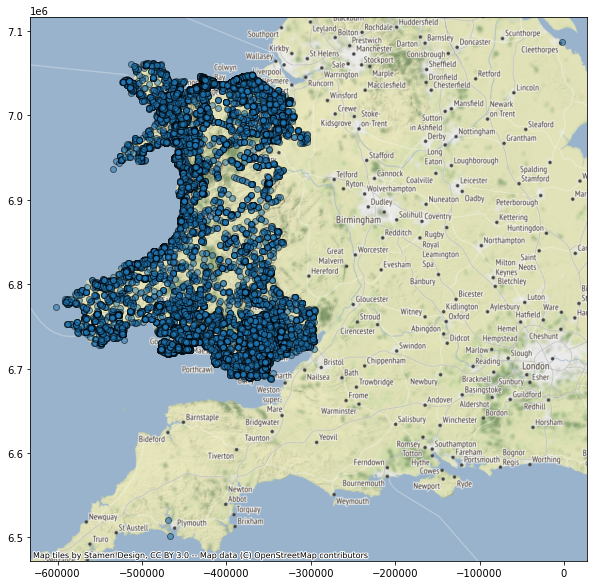

In [30]:
report = gdf.profiler.report()
report.to_file('report.json')